In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, 
                            roc_auc_score, classification_report, confusion_matrix)

In [5]:
# Load preprocessed dataset
df = pd.read_csv(r"C:\Users\Admin\OneDrive\Documents\Data Science Portfolio\Customer Churn\Data\Processed Fintech Churn.csv")
display(df.head())

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,months_active,has_cash_card,MultipleLines,digital_access_level,...,TechSupport,StreamingTV,StreamingMovies,subscription_type,PaperlessBilling,PaymentMethod,monthly_spend,total_transaction_value,churned,avg_spend_per_month
0,0,7590-VHVEG,0,0,1,0,-1.280248,0,1,0,...,0,0,0,0,1,2,29.85,-0.994194,0,-1.157889
1,1,5575-GNVDE,1,0,0,0,0.064303,1,0,0,...,0,0,0,1,0,3,56.95,-0.173740,0,-0.305658
2,2,3668-QPYBK,1,0,0,0,-1.239504,1,0,0,...,0,0,0,0,1,3,53.85,-0.959649,1,-0.355305
3,3,7795-CFOCW,1,0,0,0,0.512486,0,1,0,...,2,0,0,1,0,0,42.30,-0.195248,0,-0.791614
4,4,9237-HQITU,0,0,0,0,-1.239504,1,0,1,...,0,0,0,0,1,2,70.70,-0.940457,1,0.365282


In [13]:
from sklearn.preprocessing import StandardScaler

# Split data into features and targets
x = df.drop(columns = ["churned", "customerID"], errors = 'ignore') # Exclude ID if present
y = df["churned"]

# Split into training and test sets
x = np.random.rand(100, 5) # 100 samples, 5 features
y = np.random.randint(0, 2, 100) # Binary target
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42, stratify = y)

# 1. Scale your features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) # Use transform, not fit_transform, on test data

# 2. Instantiate and train the Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(x_train_scaled, y_train)

LogisticRegression(max_iter=1000)

In [23]:
# Train and evaluate models
results = []

for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test_scaled)
    y_proba = model.predict_proba(x_test_scaled)[:, 1]

    result = {
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "ROC AUC": roc_auc_score(y_test, y_proba)
    }

    results.append(result)

    print(f"\n {name} Classification Report:")
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



 Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.45      0.59        11
           1       0.57      0.89      0.70         9

    accuracy                           0.65        20
   macro avg       0.70      0.67      0.64        20
weighted avg       0.72      0.65      0.64        20

Confusion Matrix:
[[5 6]
 [1 8]]

 Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.27      0.35        11
           1       0.43      0.67      0.52         9

    accuracy                           0.45        20
   macro avg       0.46      0.47      0.44        20
weighted avg       0.47      0.45      0.43        20

Confusion Matrix:
[[3 8]
 [3 6]]


C:\Users\Admin\AppData\Local\Temp\ipykernel_24612\803573886.py:14: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Admin\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


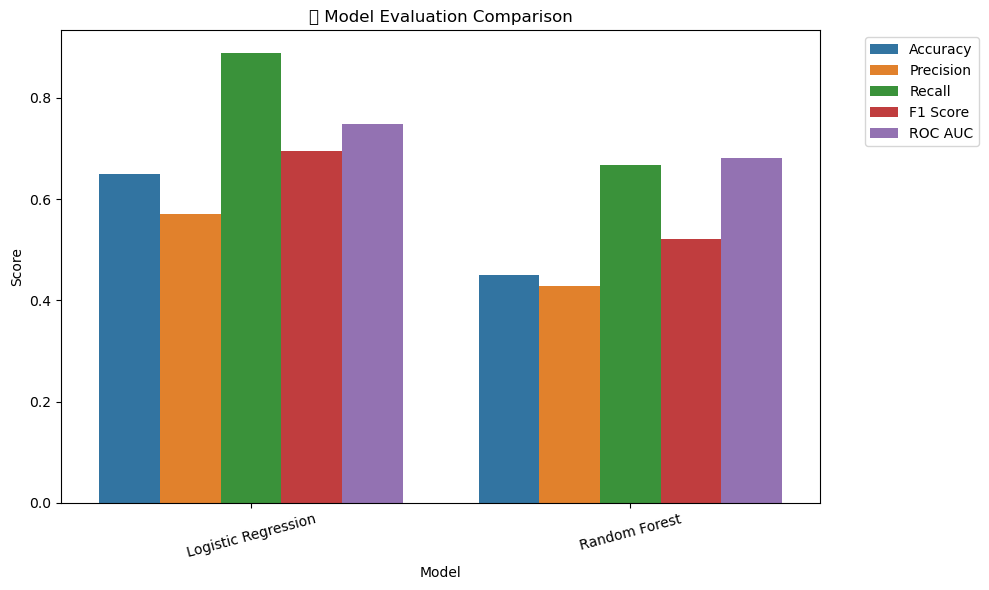

In [24]:
# Convert results to DataFrame
results_df = pd.DataFrame(results).sort_values("F1 Score", ascending=False)

# Melt for plotting
results_melted = results_df.melt(id_vars="Model", var_name="Metric", value_name="Score")

# Barplot
plt.figure(figsize=(10, 6))
sns.barplot(data=results_melted, x="Model", y="Score", hue="Metric")
plt.title("🔍 Model Evaluation Comparison")
plt.ylabel("Score")
plt.xticks(rotation=15)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

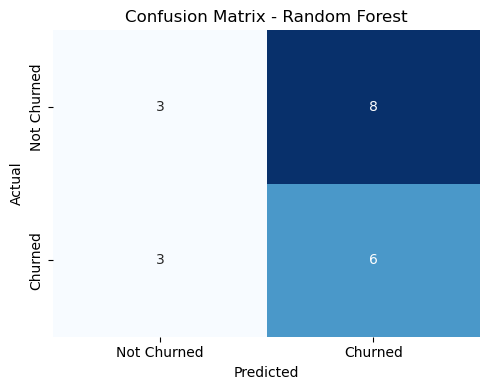

In [25]:
# Plot confusion matrix as heatmap
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", cbar=False,
            xticklabels=["Not Churned", "Churned"],
            yticklabels=["Not Churned", "Churned"])

plt.title(f"Confusion Matrix - {name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()

In [30]:
from sklearn.ensemble import RandomForestClassifier
import joblib

import os
os.makedirs(r"C:\Users\Admin\OneDrive\Documents\Data Science Portfolio\Customer Churn\app", exist_ok=True)

# Retrain full model on all data
best_model = RandomForestClassifier(n_estimators=100, random_state=42)
best_model.fit(x, y)

# Save to disk
joblib.dump(best_model, r"C:\Users\Admin\OneDrive\Documents\Data Science Portfolio\Customer Churn\app\best_model.pkl")
print("Best model saved")


Best model saved
